<a href="https://colab.research.google.com/github/edutavr/electromech-conversion/blob/main/Eletromec_Desafio_2_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d


In [50]:
# Lê o Excel diretamente do diretório atual
df = pd.read_excel("/content/MagCurve.xlsx")

### Verificando o DataFrame

In [51]:
try:
  if 'MMF' in df.columns and 'Fluxo' in df.columns:
    fmm_data = df['MMF'].values
    fluxo_data = df['Fluxo'].values
except Exception as e:
  print(f"Ocorreu um erro: {e}")

### Inicialização dos valores

In [52]:
freq = 50 # Frequência
NP = 264 # Espiras do enrolamento primário
VM = 311 #Tensão máxima

### Cálculo da velocidade angular (w) em x Hz

Velocidade angular, usada para modelar a variação senoidal do fluxo

In [53]:
w = 2 * np.pi * freq

### Calcular o Fluxo x Tempo

Flux: Representa a forma de onda do fluxo magnético
  
  VM: Tensão de pico
  
  NP: Número de espiras do enrolamento primário

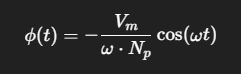

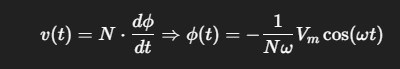

In [54]:
# Fluxo versus Tempo
time = np.arange(0, 0.340, 1/3000)
flux = -VM / (w * NP) * np.cos(w * time)

### Cálculo da FMM correspondente a um dado fluxo

Cria uma função de interpolação que permite encontrar a FMM correspondente a qualquer valor de fluxo.

A interpolação é usada para obter a relação entre o fluxo magnético e a força magneto-motriz (MMF) baseada em dados experimentais ou simulados.

flux é um vetor com milhares de valores ao longo do tempo (forma de onda do fluxo).

fluxo_para_fmm() retorna o vetor correspondente de valores de MMF.



In [60]:
# Interpolação linear
fluxo_para_fmm = interp1d(fluxo_data, fmm_data, kind='linear', fill_value="extrapolate")

Se um valor de fluxo estiver fora dos dados fornecidos, a função tenta continuar a reta para dar um resultado. Isso se chama extrapolação.

In [69]:
# FMM (mmf) correspondente ao fluxo usando a função de interpolação
mmf = fluxo_para_fmm(flux)

### Calcular a corrente de magnetização

 Corrente elétrica necessária para criar o fluxo magnético no núcleo de uma máquina elétrica. Responsável por gerar o fluxo.

Pela definição de FMM:

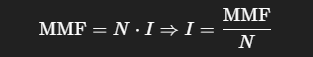

Corrente necessária para produzir o fluxo

In [63]:
# Corrente de magnetização
corrente_mag = mmf / NP

### Plot do gráfico

Análise do gráfico:

* A corrente não é uma senóide pura.

* Ela tem picos agudos e achatamento entre picos — uma característica típica da não linearidade do núcleo magnético.

Isso acontece porque:

* O fluxo magnético (Φ) segue uma forma senoidal, mas a relação MMF(Φ) não é linear, devido à saturação magnética do material. Resultado: a corrente necessária para manter o fluxo senoidal é distorcida.

* A corrente parece simétrica em torno de zero, o que é coerente com um núcleo sem magnetização remanente significativa (sem histerese visível no gráfico).


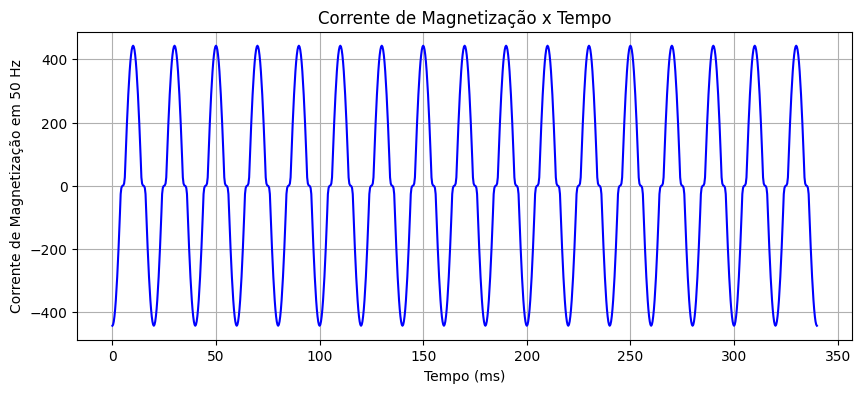

In [41]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(time * 1000, corrente_mag, color='blue')
ax.set_xlabel('Tempo (ms)')
ax.set_ylabel(f'Corrente de Magnetização em {freq} Hz')
ax.set_title('Corrente de Magnetização x Tempo')
ax.grid(True)

* Quando o núcleo está perto da saturação, é necessário aplicar uma corrente bem maior (maior MMF) para manter o fluxo aumentando. Isso causa os picos agudos na corrente de magnetização.